In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import font_manager, rc

In [2]:
# 한글 깨짐 방지 코드
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# 월별 통합 데이터 = df
df = pd.read_csv('../pre_data/월별_통합_모델링용.csv',index_col=0)
df.head()

,date,닭고기가격,병아리(원/수),hot_day,import amount,feedprice,oil_avg,도축,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,2012-01-31,3202,250,0,8754,533.6,107.066111,58873,59981,18465,0.25,3.25
2,2012-02-29,3668,420,0,10098,529.9,112.537302,55879,56019,16634,0.75,3.25
3,2012-03-31,4169,500,0,10836,527.9,117.745606,58750,50899,16317,0.25,3.25
4,2012-04-30,3399,332,0,13412,526.3,113.723667,60940,53879,15882,0.25,3.25
5,2012-05-31,3255,200,0,14519,526.2,104.184710,73505,55403,16798,0.25,3.25


In [4]:
# 일별 통합 데이터 = data
data = pd.read_csv('../pre_data/일별_통합_모델링용.csv',index_col=0)
data = data.drop(columns='한국기준금리')
data

,date,price,병아리(원/수),oil_avg,소_소비자가_int,돼지_소비자가_int,미국기준금리
0,2021-12-31,4047,400,76.703333,111396,25177,0.25
1,2021-12-30,4047,400,77.850000,111396,25411,0.25
2,2021-12-29,3895,400,77.566667,112019,26891,0.25
3,2021-12-28,3895,400,77.130000,110865,26936,0.25
4,2021-12-27,3743,400,76.530000,109225,26993,0.25
...,...,...,...,...,...,...,...
2991,2012-01-06,3166,200,108.180000,58380,19570,0.75
2992,2012-01-05,3118,200,108.260000,58870,19830,0.75
2993,2012-01-04,3118,300,108.470000,61700,20300,0.75
2994,2012-01-03,3118,300,107.000000,61030,20330,0.75


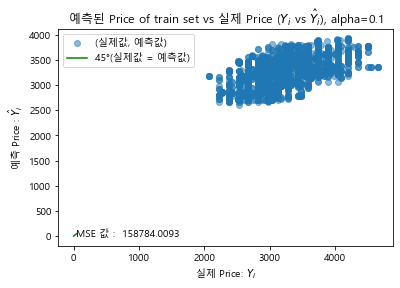

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('../pre_data/일별_통합_모델링용.csv',index_col=0)
df = df.drop(columns='date')

# feature, target 분리
feature = df.drop(columns='price')
target = df['price']

# train, test 분리
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.2, random_state = 2022)

# 하이퍼파라미터 설정
alpha_value = 0.1
lasso = Lasso(alpha=alpha_value).fit(X_train,Y_train) 
Y_pred_train = lasso.predict(X_train) 
Y_pred = lasso.predict(X_test)

# 시각화
plt.scatter(Y_train,Y_pred_train, label = '(실제값, 예측값)', alpha=.5)
plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
plt.xlabel("실제 Price: $Y_i$")
plt.ylabel("예측 Price : $\hat{Y}_i$")
plt.legend()
plt.title("예측된 Price of train set vs 실제 Price ($Y_i$ vs $\hat{Y}_i$), " + f"alpha={alpha_value}")
plt.text(y=0,x=35, s=f'MSE 값 : {mean_squared_error(Y_train,Y_pred_train) : .4f}')
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
alphas = np.linspace(0, 1, 100)
parameters = {'alpha': alphas }
lasso_reg = GridSearchCV(lasso, parameters, scoring='r2',cv=5)
lasso_reg.fit(feature,target)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the 

{'alpha': 1.0}
-0.48508674027916676
